In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.6138 - accuracy: 0.8163 - val_loss: 0.2395 - val_accuracy: 0.9262
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2438 - accuracy: 0.9246 - val_loss: 0.1812 - val_accuracy: 0.9444
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1579 - accuracy: 0.9516 - val_loss: 0.2063 - val_accuracy: 0.9339
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1123 - accuracy: 0.9650 - val_loss: 0.1363 - val_accuracy: 0.9587
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0815 - accuracy: 0.9740 - val_loss: 0.1600 - val_accuracy: 0.9542
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0620 - accuracy: 0.9800 - val_loss: 0.1518 - val_accuracy: 0.9570
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.1142 - val_accuracy: 0.9690

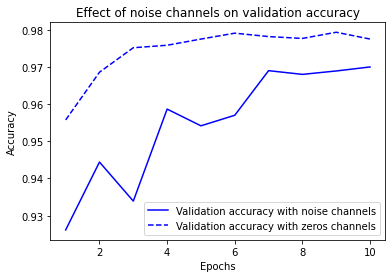

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 9ms/step - loss: 2.3173 - accuracy: 0.1052 - val_loss: 2.3058 - val_accuracy: 0.1004
Epoch 2/100
375/375 [==============================] - 3s 9ms/step - loss: 2.3006 - accuracy: 0.1155 - val_loss: 2.3108 - val_accuracy: 0.1046
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2913 - accuracy: 0.1259 - val_loss: 2.3194 - val_accuracy: 0.0978
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2774 - accuracy: 0.1401 - val_loss: 2.3253 - val_accuracy: 0.1082
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2595 - accuracy: 0.1546 - val_loss: 2.3336 - val_accuracy: 0.1025
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2396 - accuracy: 0.1681 - val_loss: 2.3437 - val_accuracy: 0.1051
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2147 - accuracy: 0.1845 - val_loss: 2.3585 - val_accuracy: 0.1002

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 917.8611 - accuracy: 0.4100 - val_loss: 2.7179 - val_accuracy: 0.2887
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 3.8049 - accuracy: 0.2780 - val_loss: 3.0869 - val_accuracy: 0.2542
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 3.6233 - accuracy: 0.2457 - val_loss: 2.1675 - val_accuracy: 0.2502
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 3.2002 - accuracy: 0.2660 - val_loss: 3.4028 - val_accuracy: 0.2577
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 2.8072 - accuracy: 0.2770 - val_loss: 2.9950 - val_accuracy: 0.2840
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.5835 - accuracy: 0.2715 - val_loss: 1.9850 - val_accuracy: 0.2953
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 2.5739 - accuracy: 0.2907 - val_loss: 1.9989 - val_accuracy: 0.2528
Epoc

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3807 - accuracy: 0.9099 - val_loss: 0.2544 - val_accuracy: 0.9373
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1405 - accuracy: 0.9631 - val_loss: 0.1568 - val_accuracy: 0.9660
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1147 - accuracy: 0.9733 - val_loss: 0.1667 - val_accuracy: 0.9689
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0944 - accuracy: 0.9783 - val_loss: 0.1653 - val_accuracy: 0.9703
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0862 - accuracy: 0.9812 - val_loss: 0.2077 - val_accuracy: 0.9679
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0819 - accuracy: 0.9837 - val_loss: 0.2070 - val_accuracy: 0.9726
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0714 - accuracy: 0.9863 - val_loss: 0.2267 - val_accuracy: 0.9723
Epoch 

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6703 - accuracy: 0.8318 - val_loss: 0.3594 - val_accuracy: 0.9031
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.9029 - val_loss: 0.3112 - val_accuracy: 0.9123
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3165 - accuracy: 0.9125 - val_loss: 0.2900 - val_accuracy: 0.9213
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3000 - accuracy: 0.9154 - val_loss: 0.2800 - val_accuracy: 0.9231
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2898 - accuracy: 0.9182 - val_loss: 0.2757 - val_accuracy: 0.9229
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9212 - val_loss: 0.2725 - val_accuracy: 0.9245
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2785 - accuracy: 0.9223 - val_loss: 0.2688 - val_accuracy: 0.9283
Epoch 

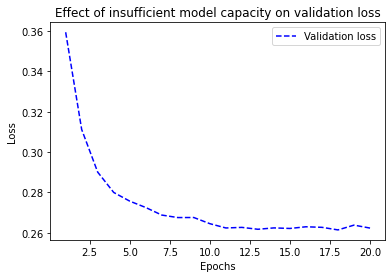

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3677 - accuracy: 0.8942 - val_loss: 0.2183 - val_accuracy: 0.9365
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1678 - accuracy: 0.9501 - val_loss: 0.1460 - val_accuracy: 0.9580
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1176 - accuracy: 0.9650 - val_loss: 0.1164 - val_accuracy: 0.9672
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0908 - accuracy: 0.9721 - val_loss: 0.1091 - val_accuracy: 0.9668
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0721 - accuracy: 0.9782 - val_loss: 0.1017 - val_accuracy: 0.9707
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0607 - accuracy: 0.9808 - val_loss: 0.0909 - val_accuracy: 0.9732
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.0970 - val_accuracy: 0.9737
Epoch 

In [12]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5513 - accuracy: 0.7695 - val_loss: 0.4183 - val_accuracy: 0.8733
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3348 - accuracy: 0.9011 - val_loss: 0.3215 - val_accuracy: 0.8892
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2403 - accuracy: 0.9256 - val_loss: 0.3050 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1885 - accuracy: 0.9399 - val_loss: 0.2851 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1510 - accuracy: 0.9533 - val_loss: 0.2811 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1236 - accuracy: 0.9629 - val_loss: 0.2902 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1020 - accurac

In [13]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 0.6308 - accuracy: 0.6398 - val_loss: 0.5892 - val_accuracy: 0.7249
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5537 - accuracy: 0.7691 - val_loss: 0.5470 - val_accuracy: 0.7456
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5061 - accuracy: 0.8268 - val_loss: 0.5128 - val_accuracy: 0.8148
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4687 - accuracy: 0.8657 - val_loss: 0.4890 - val_accuracy: 0.8616
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4377 - accuracy: 0.8922 - val_loss: 0.4696 - val_accuracy: 0.8602
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4108 - accuracy: 0.9096 - val_loss: 0.4542 - val_accuracy: 0.8720
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3861 - accuracy: 0.9239 - val_loss: 0.4439 - val_accuracy: 0.8686
Epoch 8/20
30

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 221ms/step - loss: 0.5391 - accuracy: 0.7556 - val_loss: 0.3484 - val_accuracy: 0.8453
Epoch 2/20
30/30 [==============================] - 6s 211ms/step - loss: 0.2400 - accuracy: 0.9043 - val_loss: 0.2745 - val_accuracy: 0.8922
Epoch 3/20
30/30 [==============================] - 6s 211ms/step - loss: 0.1562 - accuracy: 0.9427 - val_loss: 0.2787 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 6s 214ms/step - loss: 0.0797 - accuracy: 0.9736 - val_loss: 0.3686 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 6s 213ms/step - loss: 0.0805 - accuracy: 0.9775 - val_loss: 0.3394 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 6s 215ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.5190 - val_accuracy: 0.8891
Epoch 7/20
30/30 [==============================] - 6s 214ms/step - loss: 6.9339e-04 - accuracy: 0.9999 - val_loss: 0.6227 - val_accuracy: 0.8878
Ep

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5692 - accuracy: 0.7877 - val_loss: 0.4429 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3732 - accuracy: 0.8986 - val_loss: 0.4033 - val_accuracy: 0.8690
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3136 - accuracy: 0.9181 - val_loss: 0.3565 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2798 - accuracy: 0.9314 - val_loss: 0.3656 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2695 - accuracy: 0.9341 - val_loss: 0.3627 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2531 - accuracy: 0.9401 - val_loss: 0.3658 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2412 - accuracy: 0.9450 - val_loss: 0.3700 - val_accuracy: 0.8823
Epoch 8/20
30

In [16]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.6591 - accuracy: 0.5959 - val_loss: 0.5785 - val_accuracy: 0.8273
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5699 - accuracy: 0.7152 - val_loss: 0.4875 - val_accuracy: 0.8665
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4961 - accuracy: 0.7805 - val_loss: 0.4160 - val_accuracy: 0.8780
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4349 - accuracy: 0.8290 - val_loss: 0.3515 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3830 - accuracy: 0.8588 - val_loss: 0.3165 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3327 - accuracy: 0.8852 - val_loss: 0.2913 - val_accuracy: 0.8923
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2973 - accuracy: 0.9045 - val_loss: 0.2821 - val_accuracy: 0.8928
Epoch 8/20
30